In [50]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import style #自定义图表风格
style.use('ggplot')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
plt.rcParams['font.sans-serif'] = ['Simhei'] # 解决中文乱码问题
import random
import re
import jieba.posseg as psg
import itertools
#conda install -c anaconda gensim
from gensim import corpora,models #主题挖掘，提取关键信息

#pip install wordcloud
from wordcloud import WordCloud,ImageColorGenerator
from collections import Counter

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import graphviz

## 一、导入数据

In [2]:
raw_data= pd.read_excel(r"C:\Users\yanghong\Desktop\TD\C\附件1\景区评论.xlsx")
raw_data.head()

,景区名称,评论日期,评论内容
0,A01,2020-06-16,是亲子游的绝佳场所，门票就是有点贵，不过可以接受，爷爷奶奶不放心小朋友也跟上来了，当天我们十...
1,A01,2020-01-23,**景区差不多，票价偏贵了。大马戏比较精彩，八点的场次，6点40才能检票进入，我们6点多看看...
2,A01,2020-03-22,很有**特色的亲子酒店，房间里的装修很可爱，小孩子特别喜欢，洗漱用品也很有特色，对应的房间还...
3,A01,2020-12-25,有园区的工作人员在那，他会主动给你园区里的地图和表演的时间安排，很周到，上接驳车大概也是34...
4,A01,2020-11-28,周五逃课跟朋友在广州集合！终于如愿以偿的到达欢乐世界。学生票198 需要出示相关证件（校卡或...


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59106 entries, 0 to 59105
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   景区名称    59106 non-null  object
 1   评论日期    59106 non-null  object
 2   评论内容    59106 non-null  object
dtypes: object(3)
memory usage: 1.4+ MB


In [4]:
raw_data.columns

Index(['景区名称', '评论日期', '评论内容'], dtype='object')

In [5]:
#取值分布
for cate in ['景区名称','评论日期','评论内容']:
    raw_data[cate].value_counts()

A01    4663
A02    4450
A03    4008
A04    3639
A05    3622
A06    3531
A07    3298
A08    2753
A09    2564
A10    1920
A11    1892
A12    1346
A13    1224
A14    1154
A15    1111
A16     993
A17     977
A18     925
A19     923
A20     898
A21     881
A22     839
A23     714
A24     686
A25     651
A26     640
A27     632
A28     608
A29     587
A30     553
A31     548
A32     528
A33     378
A34     366
A36     361
A35     361
A37     336
A38     320
A39     303
A40     299
A41     298
A42     297
A43     288
A44     265
A45     264
A46     256
A47     245
A48     239
A49     236
A50     236
Name: 景区名称, dtype: int64

2015-10-04    426
2015-10-03    335
2020-05-01    235
2016-02-13    219
2015-10-06    214
             ... 
2017-12-06      1
2021-01-15      1
2017-12-10      1
2021-03-01      1
2017-11-28      1
Name: 评论日期, Length: 1521, dtype: int64

5分，景色很美，很好玩。                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              40
5分，景色很美，很好玩                                                                                                                                                                                                                                                                                                                                                                                                                

In [48]:
data=raw_data
data['评价']=0
datas=data['评价']
datas

0        0
1        0
2        0
3        0
4        0
        ..
59101    0
59102    0
59103    0
59104    0
59105    0
Name: 评价, Length: 59106, dtype: int64

In [51]:
for i in range(0,59106):
    abc=[]
    abc=datas[i]
    percent=88

    prob = random.randrange(0,100)
    if prob < percent:
        abc=1
    else:
        abc=0
    datas[i]=abc
print(datas)

<ipython-input-51-a985683511c2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas[i]=abc


0        0
1        1
2        1
3        1
4        1
        ..
59101    1
59102    1
59103    1
59104    1
59105    1
Name: 评价, Length: 59106, dtype: int64


In [52]:
str(datas)

'0        0\n1        1\n2        1\n3        1\n4        1\n        ..\n59101    1\n59102    1\n59103    1\n59104    1\n59105    1\nName: 评价, Length: 59106, dtype: int64'

In [53]:
datass=datas.reset_index(level=False, drop=False, name='评价', inplace=False)
datass

,index,评价
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
59101,59101,1
59102,59102,1
59103,59103,1
59104,59104,1


In [54]:
jqs=datass['评价']

In [55]:
data['评价']=jqs
data

,景区名称,评论日期,评论内容,评价
0,A01,2020-06-16,是亲子游的绝佳场所，门票就是有点贵，不过可以接受，爷爷奶奶不放心小朋友也跟上来了，当天我们十...,0
1,A01,2020-01-23,**景区差不多，票价偏贵了。大马戏比较精彩，八点的场次，6点40才能检票进入，我们6点多看看...,1
2,A01,2020-03-22,很有**特色的亲子酒店，房间里的装修很可爱，小孩子特别喜欢，洗漱用品也很有特色，对应的房间还...,1
3,A01,2020-12-25,有园区的工作人员在那，他会主动给你园区里的地图和表演的时间安排，很周到，上接驳车大概也是34...,1
4,A01,2020-11-28,周五逃课跟朋友在广州集合！终于如愿以偿的到达欢乐世界。学生票198 需要出示相关证件（校卡或...,1
...,...,...,...,...
59101,A50,2015-02-25,还好吧。我们刚刚到瀑布楼遇到一点小意外，打电话到景区办公室要求帮助，景区值班领导马上行动，在...,1
59102,A50,2015-02-25,山高路远，走的很辛苦。景色宜人爬山很累。,1
59103,A50,2015-02-22,环境很好，空气非常棒，很适合全家旅游，特别是避暑,1
59104,A50,2015-02-16,都很方便，价格实惠吧，可以预早就订好。,1


In [57]:
raw_data=data
raw_data

,景区名称,评论日期,评论内容,评价
0,A01,2020-06-16,是亲子游的绝佳场所，门票就是有点贵，不过可以接受，爷爷奶奶不放心小朋友也跟上来了，当天我们十...,0
1,A01,2020-01-23,**景区差不多，票价偏贵了。大马戏比较精彩，八点的场次，6点40才能检票进入，我们6点多看看...,1
2,A01,2020-03-22,很有**特色的亲子酒店，房间里的装修很可爱，小孩子特别喜欢，洗漱用品也很有特色，对应的房间还...,1
3,A01,2020-12-25,有园区的工作人员在那，他会主动给你园区里的地图和表演的时间安排，很周到，上接驳车大概也是34...,1
4,A01,2020-11-28,周五逃课跟朋友在广州集合！终于如愿以偿的到达欢乐世界。学生票198 需要出示相关证件（校卡或...,1
...,...,...,...,...
59101,A50,2015-02-25,还好吧。我们刚刚到瀑布楼遇到一点小意外，打电话到景区办公室要求帮助，景区值班领导马上行动，在...,1
59102,A50,2015-02-25,山高路远，走的很辛苦。景色宜人爬山很累。,1
59103,A50,2015-02-22,环境很好，空气非常棒，很适合全家旅游，特别是避暑,1
59104,A50,2015-02-16,都很方便，价格实惠吧，可以预早就订好。,1


## 二、数据预处理

### （一）去重

删除系统自动为客户做出的评论。

In [70]:
reviews=raw_data.copy()
reviews=reviews[['评论内容','评价']]
print('去重之前：',reviews.shape[0])
reviews=reviews.drop_duplicates()
print('去重之后：',reviews.shape[0])

去重之前： 59106
去重之后： 58572


### （二）数据清洗

In [59]:
# 清洗之前
content=reviews['评论内容']
for i in range(5,10):
    print(content[i])
    print('-----------')

优惠力度不如成人，但是进去玩一天这个价是值回来的！
-----------
最好提前到。 我从这位代理商这里订的。 在官方的取票点拿不到。马戏非常精彩，来广州必须要看。看了终身忘不掉。
-----------
果然是收费高的景区，里面人员服务确实比较热情，动物园太大了，逛逛拍拍，7小时以上，吃饭特别贵，最普通的饭78起。。矿水卖到10块。。不过还好，里面的动物养的比较好，不过种类也不算特别多吧，有机会的一定要坐小火车，不过人特别多，排队个把小时，马戏特别好看，节目很精彩，可惜人很多，8点的马戏，6.30去排队，前面都已经一堆人了，所以建议大家提前两小时排队比较好
-----------
**飞了乐园是我去过的所有动物园里感觉最好的。每到一处，基本都会有讲解员给你讲解，了解了许多鸟类生活知识。并且园里有到2号地铁站的穿梭巴士。非常方便。工作人员的态度非常好，服务十分热心。走在景区里，时不时头顶上的树枝上，草丛中都会停有不同的鸟类，以鹦鹉居多，形色各异。真是给人以小小的惊喜。景区内的水卖的比较贵，矿泉水12人一瓶，建议自带。小朋友还可以买食投喂小动物，非常有趣。不同的时间段还有不同的动物表演。真的值得推荐大家去游玩。
-----------
**三园区的联票还是比较方便的，但也让人有点郁闷。我们家小孩没有一米，碰见个傻子验票员，硬要给她量身高，行，咱量，穿着鞋子都没有一米，她脑残量完一遍居然说脱鞋子再量一遍，我是又好笑又好气。旁边的游客都在骂她，问她数学怎么学的，智商堪忧啊！
-----------


In [60]:
#清洗之后，将数字、字母等字样都删除
info=re.compile('[0-9a-zA-Z]|景区|')
content=content.apply(lambda x: info.sub('',x))  #替换所有匹配项

for i in range(5,10):
    print(content[i])
    print('-----------')

优惠力度不如成人，但是进去玩一天这个价是值回来的！
-----------
最好提前到。 我从这位代理商这里订的。 在官方的取票点拿不到。马戏非常精彩，来广州必须要看。看了终身忘不掉。
-----------
果然是收费高的，里面人员服务确实比较热情，动物园太大了，逛逛拍拍，小时以上，吃饭特别贵，最普通的饭起。。矿水卖到块。。不过还好，里面的动物养的比较好，不过种类也不算特别多吧，有机会的一定要坐小火车，不过人特别多，排队个把小时，马戏特别好看，节目很精彩，可惜人很多，点的马戏，.去排队，前面都已经一堆人了，所以建议大家提前两小时排队比较好
-----------
**飞了乐园是我去过的所有动物园里感觉最好的。每到一处，基本都会有讲解员给你讲解，了解了许多鸟类生活知识。并且园里有到号地铁站的穿梭巴士。非常方便。工作人员的态度非常好，服务十分热心。走在里，时不时头顶上的树枝上，草丛中都会停有不同的鸟类，以鹦鹉居多，形色各异。真是给人以小小的惊喜。内的水卖的比较贵，矿泉水人一瓶，建议自带。小朋友还可以买食投喂小动物，非常有趣。不同的时间段还有不同的动物表演。真的值得推荐大家去游玩。
-----------
**三园区的联票还是比较方便的，但也让人有点郁闷。我们家小孩没有一米，碰见个傻子验票员，硬要给她量身高，行，咱量，穿着鞋子都没有一米，她脑残量完一遍居然说脱鞋子再量一遍，我是又好笑又好气。旁边的游客都在骂她，问她数学怎么学的，智商堪忧啊！
-----------


### （三）分词、词性标注、去除停用词、词云图

(1)分词

In [61]:
#分词，由元组组成的list
seg_content=content.apply( lambda s:  [(x.word,x.flag) for x in psg.cut(s)] )  

seg_content.shape
len(seg_content)
print(seg_content[5])

(58486,)

58486

[('优惠', 'vn'), ('力度', 'n'), ('不如', 'c'), ('成人', 'n'), ('，', 'x'), ('但是', 'c'), ('进去', 'v'), ('玩', 'v'), ('一天', 'm'), ('这个', 'r'), ('价是值', 'l'), ('回来', 'v'), ('的', 'uj'), ('！', 'x')]


In [62]:
#统计评论词数
n_word=seg_content.apply(lambda s: len(s))

len(n_word)
n_word.head(6)

58486

0    131
1     63
2    133
3    174
4    182
5     14
Name: 评论内容, dtype: int64

In [63]:
#得到各分词在第几条评论
n_content=[ [x+1]*y for x,y in zip(list(seg_content.index),list(n_word))] #[x+1]*y,表示复制y份，由list组成的list
index_content_long=sum(n_content,[]) #表示去掉[]，拉平,返回list
len(index_content_long)

1588661

In [64]:
sum([[2,2],[3,3,3]],[])

[2, 2, 3, 3, 3]

In [65]:
#分词及词性，去掉[]，拉平
seg_content.head()

seg_content_long=sum(seg_content,[])

seg_content_long

type(seg_content_long)
len(seg_content_long)

0    [(是, v), (亲子, n), (游, v), (的, uj), (绝佳, z), (场...
1    [(*, x), (*, x), (差不多, l), (，, x), (票价, n), (偏...
2    [(很, d), (有, v), (*, x), (*, x), (特色, n), (的, ...
3    [(有, v), (园区, n), (的, uj), (工作人员, n), (在, p), ...
4    [(周五, t), (逃课, v), (跟, p), (朋友, n), (在, p), (广...
Name: 评论内容, dtype: object

[('是', 'v'),
 ('亲子', 'n'),
 ('游', 'v'),
 ('的', 'uj'),
 ('绝佳', 'z'),
 ('场所', 'n'),
 ('，', 'x'),
 ('门票', 'n'),
 ('就是', 'd'),
 ('有点', 'n'),
 ('贵', 'a'),
 ('，', 'x'),
 ('不过', 'c'),
 ('可以', 'c'),
 ('接受', 'v'),
 ('，', 'x'),
 ('爷爷奶奶', 'n'),
 ('不', 'd'),
 ('放心', 'v'),
 ('小朋友', 'n'),
 ('也', 'd'),
 ('跟上来', 'v'),
 ('了', 'ul'),
 ('，', 'x'),
 ('当天', 't'),
 ('我们', 'r'),
 ('十点', 'm'),
 ('多', 'm'),
 ('就', 'd'),
 ('到', 'v'),
 ('了', 'ul'),
 ('，', 'x'),
 ('错过', 'v'),
 ('了', 'ul'),
 ('节假日', 't'),
 ('，', 'x'),
 ('人', 'n'),
 ('也', 'd'),
 ('还是', 'c'),
 ('多', 'm'),
 ('，', 'x'),
 ('不过', 'c'),
 ('错峰', 'n'),
 ('出行', 'v'),
 ('我们', 'r'),
 ('一天', 'm'),
 ('是', 'v'),
 ('把', 'p'),
 ('动物园', 'n'),
 ('逛完', 'v'),
 ('了', 'ul'),
 ('，', 'x'),
 ('两种', 'm'),
 ('路线', 'n'),
 ('都', 'd'),
 ('逛', 'v'),
 ('完', 'v'),
 ('了', 'ul'),
 ('，', 'x'),
 ('早上', 't'),
 ('我们', 'r'),
 ('先', 'd'),
 ('坐', 'v'),
 ('的', 'uj'),
 ('缆车', 'n'),
 ('，', 'x'),
 ('缆车', 'n'),
 ('人', 'n'),
 ('多', 'm'),
 ('，', 'x'),
 ('排', 'v'),
 ('了', 'ul'),
 ('半小时', 'b'),
 ('

list

1588661

In [66]:
seg_content_long[0]

('是', 'v')

In [67]:
#得到加长版的分词、词性
word_long=[x[0] for x in seg_content_long]
nature_long=[x[1] for x in seg_content_long]

len(word_long)
len(nature_long)

1588661

1588661

In [72]:
#拉长
n_content_type=[ [x]*y for x,y in zip(list(reviews['评价']),list(n_word))] #[x+1]*y,表示复制y份
content_type_long=sum(n_content_type,[]) #表示去掉[]，拉平

len(content_type_long)

1588661

In [73]:
review_long=pd.DataFrame({'index_content':index_content_long,
                        'word':word_long,
                        'nature':nature_long,
                        'content_type':content_type_long})
review_long.shape
review_long.head()

(1588661, 4)

,index_content,word,nature,content_type
0,1,是,v,0
1,1,亲子,n,0
2,1,游,v,0
3,1,的,uj,0
4,1,绝佳,z,0


（2）去除标点符号、去除停用词

In [74]:
review_long['nature'].unique()

array(['v', 'n', 'uj', 'z', 'x', 'd', 'a', 'c', 'ul', 't', 'r', 'm', 'p',
       'b', 'ns', 'zg', 'l', 'u', 'uz', 'f', 'vn', 'q', 'nr', 'nrt', 's',
       'ud', 'uv', 'i', 'ad', 'ng', 'y', 'rz', 'nz', 'vq', 'nt', 'df',
       'e', 'ug', 'k', 'j', 'mq', 'tg', 'rr', 'ag', 'vg', 'an', 'h', 'o',
       'g', 'yg', 'dg', 'vd', 'nrfg', 'mg'], dtype=object)

In [75]:
#去除标点符号
review_long_clean=review_long[review_long['nature']!='x'] #x表示标点符合
review_long_clean.shape

(1279811, 4)

In [76]:
#导入停用词
stop_path=open(r"C:\Users\yanghong\Desktop\TD\正面情感词语（中文）等\stoplist.txt",encoding='UTF-8')
stop_words=stop_path.readlines()

len(stop_words)
stop_words[0:5]

5748

['\ufeff \n', '说\n', '人\n', '元\n', 'hellip\n']

In [77]:
#停用词，预处理
stop_words=[word.strip('\n') for word in stop_words]
stop_words[0:5]

['\ufeff ', '说', '人', '元', 'hellip']

In [78]:
#得到不含停用词的分词表
word_long_clean=list(set(word_long)-set(stop_words))
len(word_long_clean)

review_long_clean=review_long_clean[review_long_clean['word'].isin(word_long_clean)]
review_long_clean.shape

36434

(668377, 4)

(3)在原df中，再增加一列，该分词在本条评论的位置

In [79]:
#再次统计每条评论的分词数量
n_word=review_long_clean.groupby('index_content').count()['word']
n_word

index_word=[ list(np.arange(1,x+1)) for x in list(n_word)] 
index_word_long=sum(index_word,[]) #表示去掉[]，拉平

len(index_word_long)

index_content
1        52
2        20
3        56
4        70
5        84
         ..
59102    21
59103     6
59104     8
59105     5
59106     7
Name: word, Length: 58294, dtype: int64

668377

In [80]:
review_long_clean['index_word']=index_word_long
review_long_clean.head()

,index_content,word,nature,content_type,index_word
1,1,亲子,n,0,1
2,1,游,v,0,2
4,1,绝佳,z,0,3
5,1,场所,n,0,4
7,1,门票,n,0,5


In [81]:
review_long_clean.to_csv('1_review_long_clean.csv')

(4)提取名词

In [82]:
n_review_long_clean=review_long_clean[[ 'n' in nat for nat in review_long_clean.nature]]
n_review_long_clean.shape
n_review_long_clean.head()

(311076, 5)

,index_content,word,nature,content_type,index_word
1,1,亲子,n,0,1
5,1,场所,n,0,4
7,1,门票,n,0,5
16,1,爷爷奶奶,n,0,8
19,1,小朋友,n,0,10


In [83]:
n_review_long_clean.nature.value_counts()
n_review_long_clean.to_csv('1_n_review_long_clean.csv')

n       241756
ns       24814
nr       18916
vn       14828
nz        5243
ng        2622
nrt       1435
nt         767
an         667
nrfg        28
Name: nature, dtype: int64

（5）词云图

<Figure size 1440x720 with 0 Axes>

(-0.5, 655.5, 536.5, -0.5)

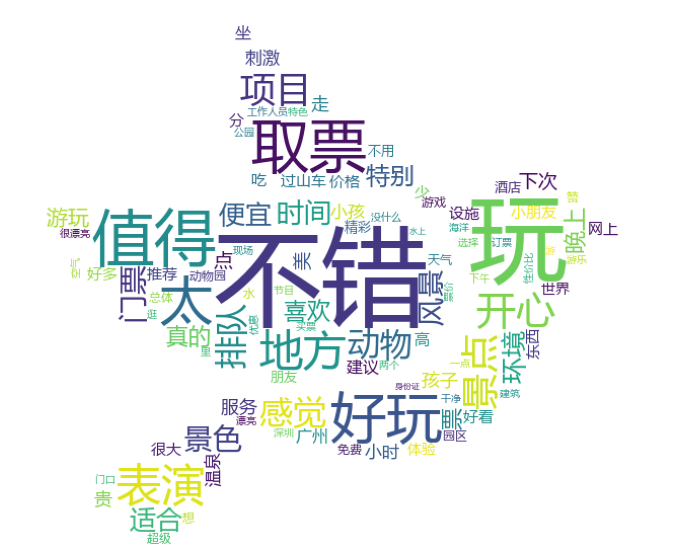

In [84]:
font=r"C:\Windows\Fonts\msyh.ttc"

background_image=plt.imread('p1.jpg')
wordcloud = WordCloud(font_path=font, max_words = 100, background_color='white',mask=background_image) #width=1600,height=1200, mode='RGBA'
wordcloud.generate_from_frequencies(Counter(review_long_clean.word.values))
wordcloud.to_file('1_分词后的词云图.png')

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<Figure size 1440x720 with 0 Axes>

(-0.5, 655.5, 536.5, -0.5)

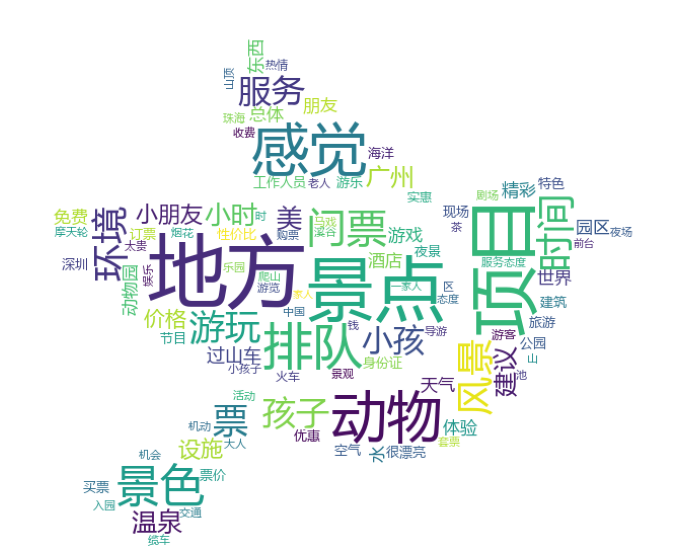

In [85]:
font=r"C:\Windows\Fonts\msyh.ttc"

background_image=plt.imread('p1.jpg')
wordcloud = WordCloud(font_path=font, max_words = 100, mode='RGBA' ,background_color='white',mask=background_image) #width=1600,height=1200
wordcloud.generate_from_frequencies(Counter(n_review_long_clean.word.values))
wordcloud.to_file('1_分词后的词云图(名词）.png')

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## 三、模型构建

In [86]:
review_long_clean

,index_content,word,nature,content_type,index_word
1,1,亲子,n,0,1
2,1,游,v,0,2
4,1,绝佳,z,0,3
5,1,场所,n,0,4
7,1,门票,n,0,5
...,...,...,...,...,...
1588650,59106,景点,n,1,3
1588653,59106,门票,n,1,4
1588654,59106,售票,n,1,5
1588655,59106,协调,v,1,6


### （一）基于决策树的情感分类

In [87]:
#第一步：构造特征空间和标签

Y=[]
for ind in review_long_clean.index_content.unique():
    y=[ word for word in review_long_clean.content_type[review_long_clean.index_content==ind].unique() ]
    Y.append(y)
len(Y)

X=[]
for ind in review_long_clean.index_content.unique():
    term=[ word for word in review_long_clean.word[review_long_clean.index_content==ind].values ]
    X.append(' '.join(term))
len(X)

X
Y

58294

58294

['亲子 游 绝佳 场所 门票 贵 接受 爷爷奶奶 放心 小朋友 跟上来 当天 十点 错过 节假日 错峰 出行 动物园 逛完 两种 路线 逛 早上 先 坐 缆车 缆车 排 半小时 队 火车 步行 区 转完 了去 坐 下午 四点 火车 站 下雨 地铁站 男 北门 接驳 车 算 满意 动物 表演 大象 表演',
 '票价 偏贵 马戏 精彩 八点 场次 点 检票 点 位置 不错 早早 拿票 动物园 北门 猫和老鼠 旗帜 工作人员 找到 就行了',
 '特色 亲子 酒店 房间 里 装修 可爱 小孩子 特别 喜欢 洗漱 用品 特色 房间 送 动物 绘本 带走 房间 大小 很大 动物园 北门 步行 分钟 酒店 门卡 酒店 门 卡里 一张 纸条 进园 坐 缆车 电影 走 快递 通道 一点 性价比 很高 小孩 大点 再来 楼下 茶餐厅 酒店 马路 对面 餐厅 吃 海鲜 早茶 楼下 好吃',
 '园区 工作人员 主动 园区 里 地图 表演 时间 安排 周到 接驳 车 分钟 车程 到达 园区 门口 下车 见到 写 电子 取票 指引 工作人员 指引 取 电子 票 很快 拿到 门票 公园 表演 项目 进园 路线 安排 园区 开门 关门 第一班 接驳 车 坐 第一班 接驳 车 前往 园区 游玩 地图 线路 走 一日 表演 项目 全 安排 妥妥 那天 园区 坐 接驳 车 回去 江 地铁站 小朋友 结束 行程',
 '周五 逃课 朋友 广州 集合 终于 如愿以偿 到达 欢乐 世界 学生票 出示 相关 证件 校卡 录取 通知书 身份证 身份证 身份证 办完 直奔 垂直 过山车 手心 直 冒汗 玩完 发现 害怕 几个 索性 过山车 玩完 导致 晚上 睡觉 过山车 心 飘飘 过山车 玩 激流 涌进 真的 爽 全身 湿透 行李 寄存 抱 包包 深圳 行李 寄存 地方 几个 电影 蛮有意思 早上 十一点 进场 晚上 蹦迪 八点 闭馆 跳楼 机 玩 打卡 取决于 当天 多不多 啊啊啊 东西 太贵 早上 吃饱 一点 一份 饭 矿泉水 烤 热狗',
 '优惠 力度 成人 玩 价是值 回来',
 '提前 这位 代理商 订 官方 取票 点 不到 马戏 精彩 广州 终身 忘不掉',
 '收费 高 人员 服务 确实 热情 动物园 太 逛逛 拍拍 小时 吃饭 特别 贵 饭 矿水 卖 块 还好 动物 养 种类 不算 特别 

[[0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1]

In [88]:
#第二步：训练集、测试集划分
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=7)

#第三步：词转向量，01矩阵
count_vec=CountVectorizer(binary=True) 
x_train=count_vec.fit_transform(x_train)
x_test=count_vec.transform(x_test)  

#第四步：构建决策树
dtc=tree.DecisionTreeClassifier(max_depth=5)
dtc.fit(x_train,y_train)
print('在训练集上的准确率：%.2f'% accuracy_score(y_train,dtc.predict(x_train)))

y_true=y_test
y_pred=dtc.predict(x_test)
print(classification_report(y_true,y_pred))
print('在测试集上的准确率：%.2f'% accuracy_score(y_true,y_pred))

DecisionTreeClassifier(max_depth=5)

在训练集上的准确率：0.88
              precision    recall  f1-score   support

           0       0.29      0.00      0.00      1408
           1       0.88      1.00      0.94     10251

    accuracy                           0.88     11659
   macro avg       0.58      0.50      0.47     11659
weighted avg       0.81      0.88      0.82     11659

在测试集上的准确率：0.88


'C:\\Users\\yanghong\\泰迪\\tree.svg'

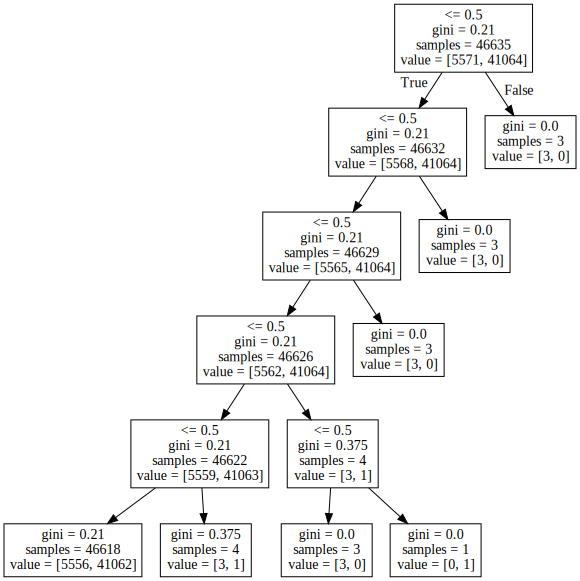

In [89]:
#第五步：画决策树

cwd=os.getcwd()
dot_data=tree.export_graphviz(dtc
                              ,out_file=None
                              ,feature_names=count_vec.get_feature_names())
graph=graphviz.Source(dot_data)
graph.format='svg'
graph.render(cwd+'/tree',view=True)
graph

### （二）情感分析

(1)导入评价情感词

In [90]:
#来自知网发布的情感分析用词语集

pos_comment=pd.read_csv('正面评价词语（中文）.txt',header=None,sep='\n',encoding='utf-8') 
neg_comment=pd.read_csv('负面评价词语（中文）.txt',header=None,sep='\n',encoding='utf-8')

pos_emotion=pd.read_csv('正面情感词语（中文）.txt',header=None,sep='\n',encoding='utf-8')
neg_emotion=pd.read_csv('负面情感词语（中文）.txt',header=None,sep='\n',encoding='utf-8')

In [91]:
pos_comment.shape
neg_comment.shape

pos_emotion.shape
neg_emotion.shape

(3743, 1)

(3138, 1)

(833, 1)

(1251, 1)

In [92]:
pos=pd.concat([pos_comment,pos_emotion],axis=0)
pos.shape

neg=pd.concat([neg_comment,neg_emotion],axis=0)
neg.shape

(4576, 1)

(4389, 1)

(2)增加新词

In [94]:
c='点赞'
c in pos.values

d='歇菜'
d in neg.values

False

False

In [95]:
new_pos=pd.Series(['点赞'])
new_neg=pd.Series(['歇菜'])
positive=pd.concat([pos,new_pos],axis=0)
positive.shape

negative=pd.concat([neg,new_neg],axis=0)
negative.shape

(4577, 1)

(4390, 1)

In [96]:
positive.columns=['review']
positive['weight']=pd.Series([1]*len(positive))
positive.head()

,review,weight
0,侻,1
1,俶傥,1
2,僄,1
3,劼,1
4,嫕,1


In [97]:
negative.columns=['review']
negative['weight']=pd.Series([-1]*len(negative))
negative.head()

,review,weight
0,僄,-1
1,啰啰唆唆,-1
2,啰啰嗦嗦,-1
3,啰里啰唆,-1
4,啰里啰嗦,-1


In [98]:
pos_neg=pd.concat([positive,negative],axis=0)
pos_neg.shape

(8967, 2)

(3)合并到review_long_clean中

In [99]:
#表联接

data=review_long_clean.copy()
review_mltype=pd.merge(data,pos_neg,how='left',left_on='word',right_on='review')
review_mltype.shape

review_mltype=review_mltype.drop(['review'],axis=1)
review_mltype=review_mltype.replace(np.nan,0)
review_mltype.head()

(668377, 7)

,index_content,word,nature,content_type,index_word,weight
0,1,亲子,n,0,1,0.0
1,1,游,v,0,2,0.0
2,1,绝佳,z,0,3,0.0
3,1,场所,n,0,4,0.0
4,1,门票,n,0,5,0.0


(4)修正情感倾向，

如有多重否定，那么奇数否定是否定，偶数否定是肯定

看该情感词前2个词，来判罚否定的语气。如果在句首，则没有否词，如果在句子的第二次词，则看前1个词，来判断否定的语气。

In [101]:
notdict=pd.read_csv('not.csv')
notdict.shape

notdict['freq']=[1]*len(notdict)
notdict.head()

(21, 1)

,term,freq
0,不,1
1,没,1
2,无,1
3,非,1
4,莫,1


In [102]:
#准备一
review_mltype['amend_weight']=review_mltype['weight']
review_mltype['id']=np.arange(0,review_mltype.shape[0])
review_mltype.head()

,index_content,word,nature,content_type,index_word,weight,amend_weight,id
0,1,亲子,n,0,1,0.0,0.0,0
1,1,游,v,0,2,0.0,0.0,1
2,1,绝佳,z,0,3,0.0,0.0,2
3,1,场所,n,0,4,0.0,0.0,3
4,1,门票,n,0,5,0.0,0.0,4


In [103]:
# 准备二，只保留有情感值的行

only_review_mltype=review_mltype[review_mltype['weight']!=0]
only_review_mltype.index=np.arange(0,only_review_mltype.shape[0]) #索引重置
only_review_mltype.shape
only_review_mltype.head()

(21546, 8)

,index_content,word,nature,content_type,index_word,weight,amend_weight,id
0,1,贵,a,0,6,-1.0,-1.0,5
1,1,满意,v,0,48,1.0,1.0,47
2,3,喜欢,v,1,10,1.0,1.0,81
3,4,很快,d,1,29,1.0,1.0,156
4,8,高,a,1,2,-1.0,-1.0,302


In [104]:
i=4
review_i=review_mltype[review_mltype['index_content']==only_review_mltype['index_content'][i]]
review_i#第i个情感词的评论

,index_content,word,nature,content_type,index_word,weight,amend_weight,id
301,8,收费,n,1,1,0.0,0.0,301
302,8,高,a,1,2,-1.0,-1.0,302
303,8,人员,n,1,3,0.0,0.0,303
304,8,服务,vn,1,4,0.0,0.0,304
305,8,确实,ad,1,5,0.0,0.0,305
306,8,热情,n,1,6,0.0,0.0,306
307,8,动物园,n,1,7,0.0,0.0,307
308,8,太,d,1,8,0.0,0.0,308
309,8,逛逛,v,1,9,0.0,0.0,309
310,8,拍拍,v,1,10,0.0,0.0,310


In [105]:
#看该情感词前2个词，来判罚否定的语气。如果在句首，则没有否词，如果在句子的第二次词，则看前1个词，来判断否定的语气。

index=only_review_mltype['id']

for i in range(0,only_review_mltype.shape[0]):
    
    review_i=review_mltype[review_mltype['index_content']==only_review_mltype['index_content'][i]] #第i个情感词的评论
    review_i.index=np.arange(0,review_i.shape[0])#重置索引后，索引值等价于index_word
    word_ind = only_review_mltype['index_word'][i] #第i个情感值在该条评论的位置
    
    #第一种，在句首。则不用判断
    #第二种，在评论的第2个为位置
    if word_ind==2:
        ne=sum( [ review_i['word'][word_ind-1] in notdict['term']  ] )
        if ne==1:
            review_mltype['amend_weight'][index[i]] = -( review_mltype['weight'][index[i]] )
    #第三种，在评论的第2个位置以后       
    elif word_ind > 2:
        ne=sum( [ word in notdict['term'] for word in review_i['word'][[word_ind-1,word_ind-2]]  ] ) # 注意用中括号[word_ind-1,word_ind-2]
        if ne==1:
            review_mltype['amend_weight'][index[i]]=- ( review_mltype['weight'][index[i]] )

In [106]:
review_mltype.shape
review_mltype[(review_mltype['weight']-review_mltype['amend_weight'])!=0] #说明两列值一样

(668377, 8)

,index_content,word,nature,content_type,index_word,weight,amend_weight,id


(5)计算每条评论的情感值

In [107]:
review_mltype.tail()

,index_content,word,nature,content_type,index_word,weight,amend_weight,id
668372,59106,景点,n,1,3,0.0,0.0,668372
668373,59106,门票,n,1,4,0.0,0.0,668373
668374,59106,售票,n,1,5,0.0,0.0,668374
668375,59106,协调,v,1,6,0.0,0.0,668375
668376,59106,很久,m,1,7,0.0,0.0,668376


In [108]:
emotion_value=review_mltype.groupby('index_content',as_index=False)['amend_weight'].sum()
emotion_value.head()
emotion_value.to_csv('./1_emotion_value',index=True,header=True)

,index_content,amend_weight
0,1,0.0
1,2,0.0
2,3,1.0
3,4,1.0
4,5,0.0


(6)查看情感分析效果

In [109]:
#每条评论的amend_weight总和不等于零

content_emotion_value=emotion_value.copy()
content_emotion_value.shape
content_emotion_value=content_emotion_value[content_emotion_value['amend_weight']!=0]
content_emotion_value['ml_type']=''
content_emotion_value['ml_type'][content_emotion_value['amend_weight']>0]='pos'
content_emotion_value['ml_type'][content_emotion_value['amend_weight']<0]='neg'

content_emotion_value.shape
content_emotion_value.head()

(58294, 2)

<ipython-input-109-2f057f38fab7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_emotion_value['ml_type'][content_emotion_value['amend_weight']>0]='pos'
<ipython-input-109-2f057f38fab7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_emotion_value['ml_type'][content_emotion_value['amend_weight']<0]='neg'


(16623, 3)

,index_content,amend_weight,ml_type
2,3,1.0,pos
3,4,1.0,pos
7,8,-1.0,neg
10,11,1.0,pos
12,13,3.0,pos


In [111]:
#每条评论的amend_weight总和等于零
#这个方法其实不好用，有一半以上的评论区分不出正、负情感。

# content_emotion_value0=emotion_value.copy()
# content_emotion_value0=content_emotion_value0[content_emotion_value0['amend_weight']==0]
# content_emotion_value0.head()

# raw_data.content[6]
# raw_data.content[7]
# raw_data.content[8]

,index_content,amend_weight
0,1,0.0
1,2,0.0
4,5,0.0
5,6,0.0
6,7,0.0


AttributeError: 'DataFrame' object has no attribute 'content'

In [112]:
#合并到大表中

content_emotion_value=content_emotion_value.drop(['amend_weight'],axis=1)
review_mltype.shape
review_mltype=pd.merge(review_mltype,content_emotion_value,how='left',left_on='index_content',right_on='index_content')
review_mltype=review_mltype.drop(['id'],axis=1)
review_mltype.shape
review_mltype.head()

review_mltype.to_csv('./1_review_mltype',index=True,header=True)

(668377, 8)

(668377, 8)

,index_content,word,nature,content_type,index_word,weight,amend_weight,ml_type
0,1,亲子,n,0,1,0.0,0.0,NaN
1,1,游,v,0,2,0.0,0.0,NaN
2,1,绝佳,z,0,3,0.0,0.0,NaN
3,1,场所,n,0,4,0.0,0.0,NaN
4,1,门票,n,0,5,0.0,0.0,NaN


In [113]:
cate=['index_content','content_type','ml_type']
data_type=review_mltype[cate].drop_duplicates()

confusion_matrix=pd.crosstab(data_type['content_type'],data_type['ml_type'],margins=True)
confusion_matrix

ml_type,neg,pos,All
content_type,,,
0,480,1473,1953
1,3675,10995,14670
All,4155,12468,16623


In [120]:
data=data_type[['content_type','ml_type']]
data=data.dropna(axis=0)
#print(classification_report(data['content_type'],data['ml_type']) )

(7)制作词云图

- 只看情感词

In [121]:
data=review_mltype.copy()
data=data[data['amend_weight']!=0]

word_data_pos=data[data['ml_type']=='pos']
word_data_neg=data[data['ml_type']=='neg']

<Figure size 1080x504 with 0 Axes>

(-0.5, 655.5, 536.5, -0.5)

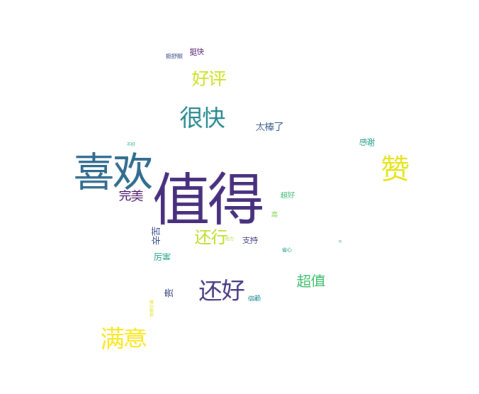

In [122]:
font=r"C:\Windows\Fonts\msyh.ttc"

background_image=plt.imread('p1.jpg')
wordcloud = WordCloud(font_path=font, max_words = 100, mode='RGBA' ,background_color='white',mask=background_image) #width=1600,height=1200
wordcloud.generate_from_frequencies(Counter(word_data_pos.word.values))

plt.figure(figsize=(15,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<Figure size 1080x504 with 0 Axes>

(-0.5, 655.5, 536.5, -0.5)

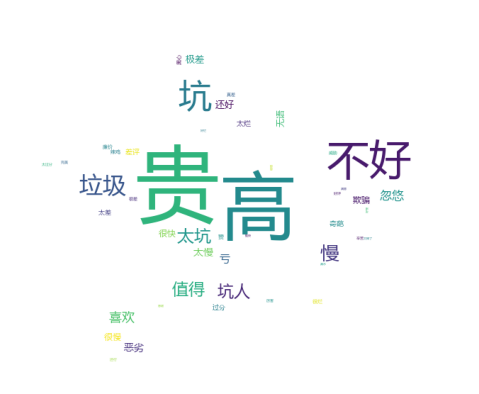

In [123]:
font=r"C:\Windows\Fonts\msyh.ttc"

background_image=plt.imread('p1.jpg')
wordcloud = WordCloud(font_path=font, max_words = 100, mode='RGBA' ,background_color='white',mask=background_image) #width=1600,height=1200
wordcloud.generate_from_frequencies(Counter(word_data_neg.word.values))

plt.figure(figsize=(15,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

- 看所有词

<Figure size 1080x504 with 0 Axes>

(-0.5, 655.5, 536.5, -0.5)

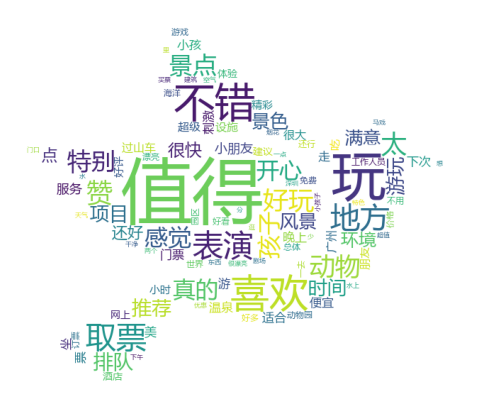

<Figure size 1080x504 with 0 Axes>

(-0.5, 655.5, 536.5, -0.5)

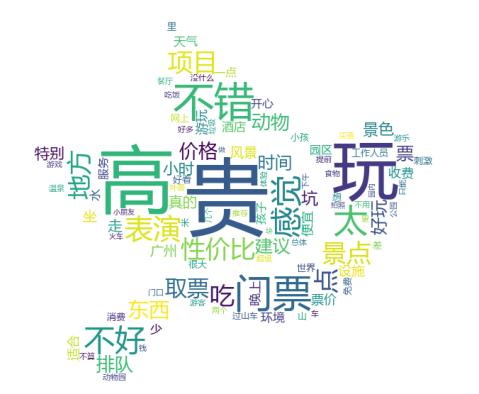

In [125]:
data=review_mltype.copy()

word_data_pos=data[data['ml_type']=='pos']
word_data_neg=data[data['ml_type']=='neg']

font=r"C:\Windows\Fonts\msyh.ttc"

background_image=plt.imread('p1.jpg')
wordcloud = WordCloud(font_path=font, max_words = 100, mode='RGBA' ,background_color='white',mask=background_image) #width=1600,height=1200
wordcloud.generate_from_frequencies(Counter(word_data_pos.word.values))

plt.figure(figsize=(15,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

background_image=plt.imread('p1.jpg')
wordcloud = WordCloud(font_path=font, max_words = 100, mode='RGBA' ,background_color='white',mask=background_image) #width=1600,height=1200
wordcloud.generate_from_frequencies(Counter(word_data_neg.word.values))

plt.figure(figsize=(15,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### （三）基于LDA模型的主题分析

优点：不需要人工调试，用相对少的迭代找到最优的主题结构。

（1）建立词典、语料库

In [126]:
data=review_mltype.copy()

word_data_pos=data[data['ml_type']=='pos']
word_data_neg=data[data['ml_type']=='neg']

In [127]:
#建立词典，去重

pos_dict=corpora.Dictionary([ [i] for i in word_data_pos.word]) #shape=(n,1)
neg_dict=corpora.Dictionary([ [i] for i in word_data_neg.word])

In [128]:
print(pos_dict)

Dictionary(16891 unique tokens: ['特色', '亲子', '酒店', '房间', '里']...)


In [129]:
#建立语料库

pos_corpus=[ pos_dict.doc2bow(j) for j in [ [i] for i in word_data_pos.word] ] #shape=(n,(2,1))
neg_corpus=[ neg_dict.doc2bow(j) for j in [ [i] for i in word_data_neg.word] ]

In [130]:
len(word_data_pos.word)
len(pos_dict)
len(pos_corpus)
pos_corpus  #元素是元组，元组（x,y),x是在词典中的位置，y是1表示存在。

169312

16891

169312

[[(0, 1)],
 [(1, 1)],
 [(2, 1)],
 [(3, 1)],
 [(4, 1)],
 [(5, 1)],
 [(6, 1)],
 [(7, 1)],
 [(8, 1)],
 [(9, 1)],
 [(10, 1)],
 [(11, 1)],
 [(0, 1)],
 [(3, 1)],
 [(12, 1)],
 [(13, 1)],
 [(14, 1)],
 [(15, 1)],
 [(3, 1)],
 [(16, 1)],
 [(17, 1)],
 [(18, 1)],
 [(19, 1)],
 [(20, 1)],
 [(21, 1)],
 [(2, 1)],
 [(22, 1)],
 [(2, 1)],
 [(23, 1)],
 [(24, 1)],
 [(25, 1)],
 [(26, 1)],
 [(27, 1)],
 [(28, 1)],
 [(29, 1)],
 [(30, 1)],
 [(31, 1)],
 [(32, 1)],
 [(33, 1)],
 [(34, 1)],
 [(35, 1)],
 [(36, 1)],
 [(37, 1)],
 [(38, 1)],
 [(39, 1)],
 [(40, 1)],
 [(41, 1)],
 [(2, 1)],
 [(42, 1)],
 [(43, 1)],
 [(44, 1)],
 [(45, 1)],
 [(46, 1)],
 [(47, 1)],
 [(40, 1)],
 [(48, 1)],
 [(49, 1)],
 [(50, 1)],
 [(51, 1)],
 [(49, 1)],
 [(4, 1)],
 [(52, 1)],
 [(53, 1)],
 [(54, 1)],
 [(55, 1)],
 [(56, 1)],
 [(57, 1)],
 [(58, 1)],
 [(21, 1)],
 [(59, 1)],
 [(60, 1)],
 [(49, 1)],
 [(61, 1)],
 [(62, 1)],
 [(63, 1)],
 [(64, 1)],
 [(65, 1)],
 [(66, 1)],
 [(67, 1)],
 [(50, 1)],
 [(67, 1)],
 [(68, 1)],
 [(65, 1)],
 [(69, 1)],
 [(70, 1)

(2)主题数寻优


In [131]:
#构造主题数寻优函数

def cos(vector1,vector2):
    '''
    函数功能：余玄相似度函数
    '''
    dot_product=0.0
    normA=0.0
    normB=0.0
    for a,b in zip(vector1,vector2):
        dot_product +=a*b
        normA +=a**2
        normB +=b**2
    if normA==0.0 or normB==0.0:
        return None
    else:
        return ( dot_product/((normA*normB)**0.5) )

In [132]:
#主题数寻优
#这个函数可以重复调用，解决其他项目的问题

def LDA_k(x_corpus,x_dict):
    '''
    函数功能：
    '''
    #初始化平均余玄相似度
    mean_similarity=[]
    mean_similarity.append(1)
    
    #循环生成主题并计算主题间相似度
    for i in np.arange(2,11):
        lda=models.LdaModel(x_corpus,num_topics=i,id2word=x_dict) #LDA模型训练
        
        for j in np.arange(i):
            term=lda.show_topics(num_words=50)
        
        #提取各主题词
        top_word=[] #shape=(i,50)
        for k in np.arange(i):
            top_word.append( [''.join(re.findall('"(.*)"',i)) for i in term[k][1].split('+')]) #列出所有词
        
        #构造词频向量
        word=sum(top_word,[]) #列车所有词
        unique_word=set(word) #去重
        
        #构造主题词列表，行表示主题号，列表示各主题词
        mat=[] #shape=(i,len(unique_word))
        for j in np.arange(i):
            top_w=top_word[j]
            mat.append( tuple([ top_w.count(k) for k in unique_word ])) #统计list中元素的频次，返回元组
        
        #两两组合。方法一
        p=list(itertools.permutations(list(np.arange(i)),2)) #返回可迭代对象的所有数学全排列方式。
        y=len(p) # y=i*(i-1)
        top_similarity=[0]
        for w in np.arange(y):
            vector1=mat[p[w][0]]
            vector2=mat[p[w][1]]
            top_similarity.append(cos(vector1,vector2))

#        #两两组合，方法二
#        for x in range(i-1):
#            for y in range(x,i):
            
        #计算平均余玄相似度
        mean_similarity.append(sum(top_similarity)/ y)
    return mean_similarity

In [133]:
#计算主题平均余玄相似度

pos_k=LDA_k(pos_corpus,pos_dict)
neg_k=LDA_k(neg_corpus,neg_dict)

pos_k
neg_k

[1, 0.0, 0.0, 0.0, 0.002, 0.0, 0.0, 0.0, 0.0, 0.0]

[1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0007142857142857143, 0.0, 0.0]

Text(0.5, 1.0, '正面评论LDA主题数寻优')

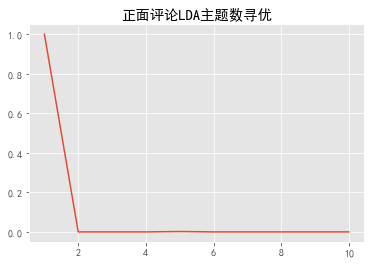

In [134]:
pd.Series(pos_k,index=range(1,11)).plot()
plt.title('正面评论LDA主题数寻优')
plt.show()

Text(0.5, 1.0, '负面评论LDA主题数寻优')

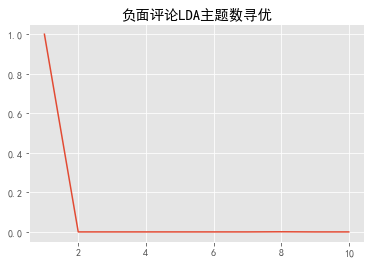

In [135]:
pd.Series(neg_k,index=range(1,11)).plot()
plt.title('负面评论LDA主题数寻优')
plt.show()

In [136]:
pos_lda=models.LdaModel(pos_corpus,num_topics=2,id2word=pos_dict)
neg_lda=models.LdaModel(neg_corpus,num_topics=2,id2word=neg_dict)

pos_lda.print_topics(num_topics=10)
neg_lda.print_topics(num_topics=10)

[(0,
  '0.032*"不错" + 0.028*"喜欢" + 0.011*"景点" + 0.010*"赞" + 0.010*"门票" + 0.010*"游" + 0.009*"感觉" + 0.009*"走" + 0.009*"好玩" + 0.008*"推荐"'),
 (1,
  '0.079*"值得" + 0.021*"玩" + 0.020*"地方" + 0.015*"温泉" + 0.014*"环境" + 0.011*"景色" + 0.010*"风景" + 0.009*"满意" + 0.009*"太" + 0.008*"特别"')]

[(0,
  '0.034*"高" + 0.022*"门票" + 0.021*"不错" + 0.013*"玩" + 0.010*"感觉" + 0.009*"走" + 0.008*"价格" + 0.007*"建议" + 0.006*"小时" + 0.006*"设施"'),
 (1,
  '0.036*"贵" + 0.013*"景点" + 0.012*"性价比" + 0.011*"地方" + 0.010*"太" + 0.009*"不好" + 0.009*"景色" + 0.008*"温泉" + 0.008*"山" + 0.008*"点"')]